#Pesebaran Informasi Covid-19 dan Vaksin di Indonesia

COVID-19 merupakan penyakit infeksi yang disebabkan oleh sindrom pernafasan akut parah coronavirus 2 (SARS-CoV-2). Ini pertama kali diidentifikasi pada Desember 2019 di Wuhan, Hubei, Cina, dan telah mengakibatkan pandemi yang sedang berlangsung. Kasus pertama yang dikonfirmasi telah ditelusuri kembali ke 17 November 2019 di Hubei. Per 6 Agustus 2020, lebih dari 18,7 juta kasus telah dilaporkan di 188 negara dan wilayah, mengakibatkan lebih dari 706.000 kematian. Lebih dari 11,3 juta orang telah pulih.

## **A.Collecting Data Twitter**

Untuk mengumpulkan data twitter dengan python, kita bisa menggunakan Tweepy. Tweepy adalah Paket Python paling populer untuk mengakses API Twitter, Anda dapat membaca dokumentasi lengkapnya [DI SINI](https://tweepy.readthedocs.io/en/latest/). Dalam latihan ini, kita akan berlatih untuk mendapatkan data tweet menggunakan kata kunci tertentu dan menyimpannya sebagai file .CSV

# **A.Social Network Analysis: Covid-19**

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import community
import seaborn as sns
import csv

### **Network Contruction**

In [ ]:
# Upload Local Dataset (Nodes) 
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


In [ ]:
df_tweets = pd.read_csv('covid.csv', sep =";")
df_tweets.head()

,source,target
0,covidnewsCH,NaN
1,covidnewsCH,NaN
2,Theupdater_,NaN
3,covidnewsCH,NaN
4,NCWIndia,NaN


In [ ]:
df_tweets2 = df_tweets.dropna()
df_tweets2

,source,target
27,mamah1987,mamah1987
61,SusanDaisy3363,DanCrenshawTX
78,LiuBaoBei1,realDonaldTrump
87,NoWasteWorld1,Louisdeconstanc
91,Disqeet,KIMAVENT
97,TreciaHart,JoeBiden
99,NJRugbyGrl,SkyNews
205,Hooksy66,LBofBexley
209,LiuBaoBei1,ClarkeMicah
221,Cdmit,paulsperry_


**Visualize The Network**

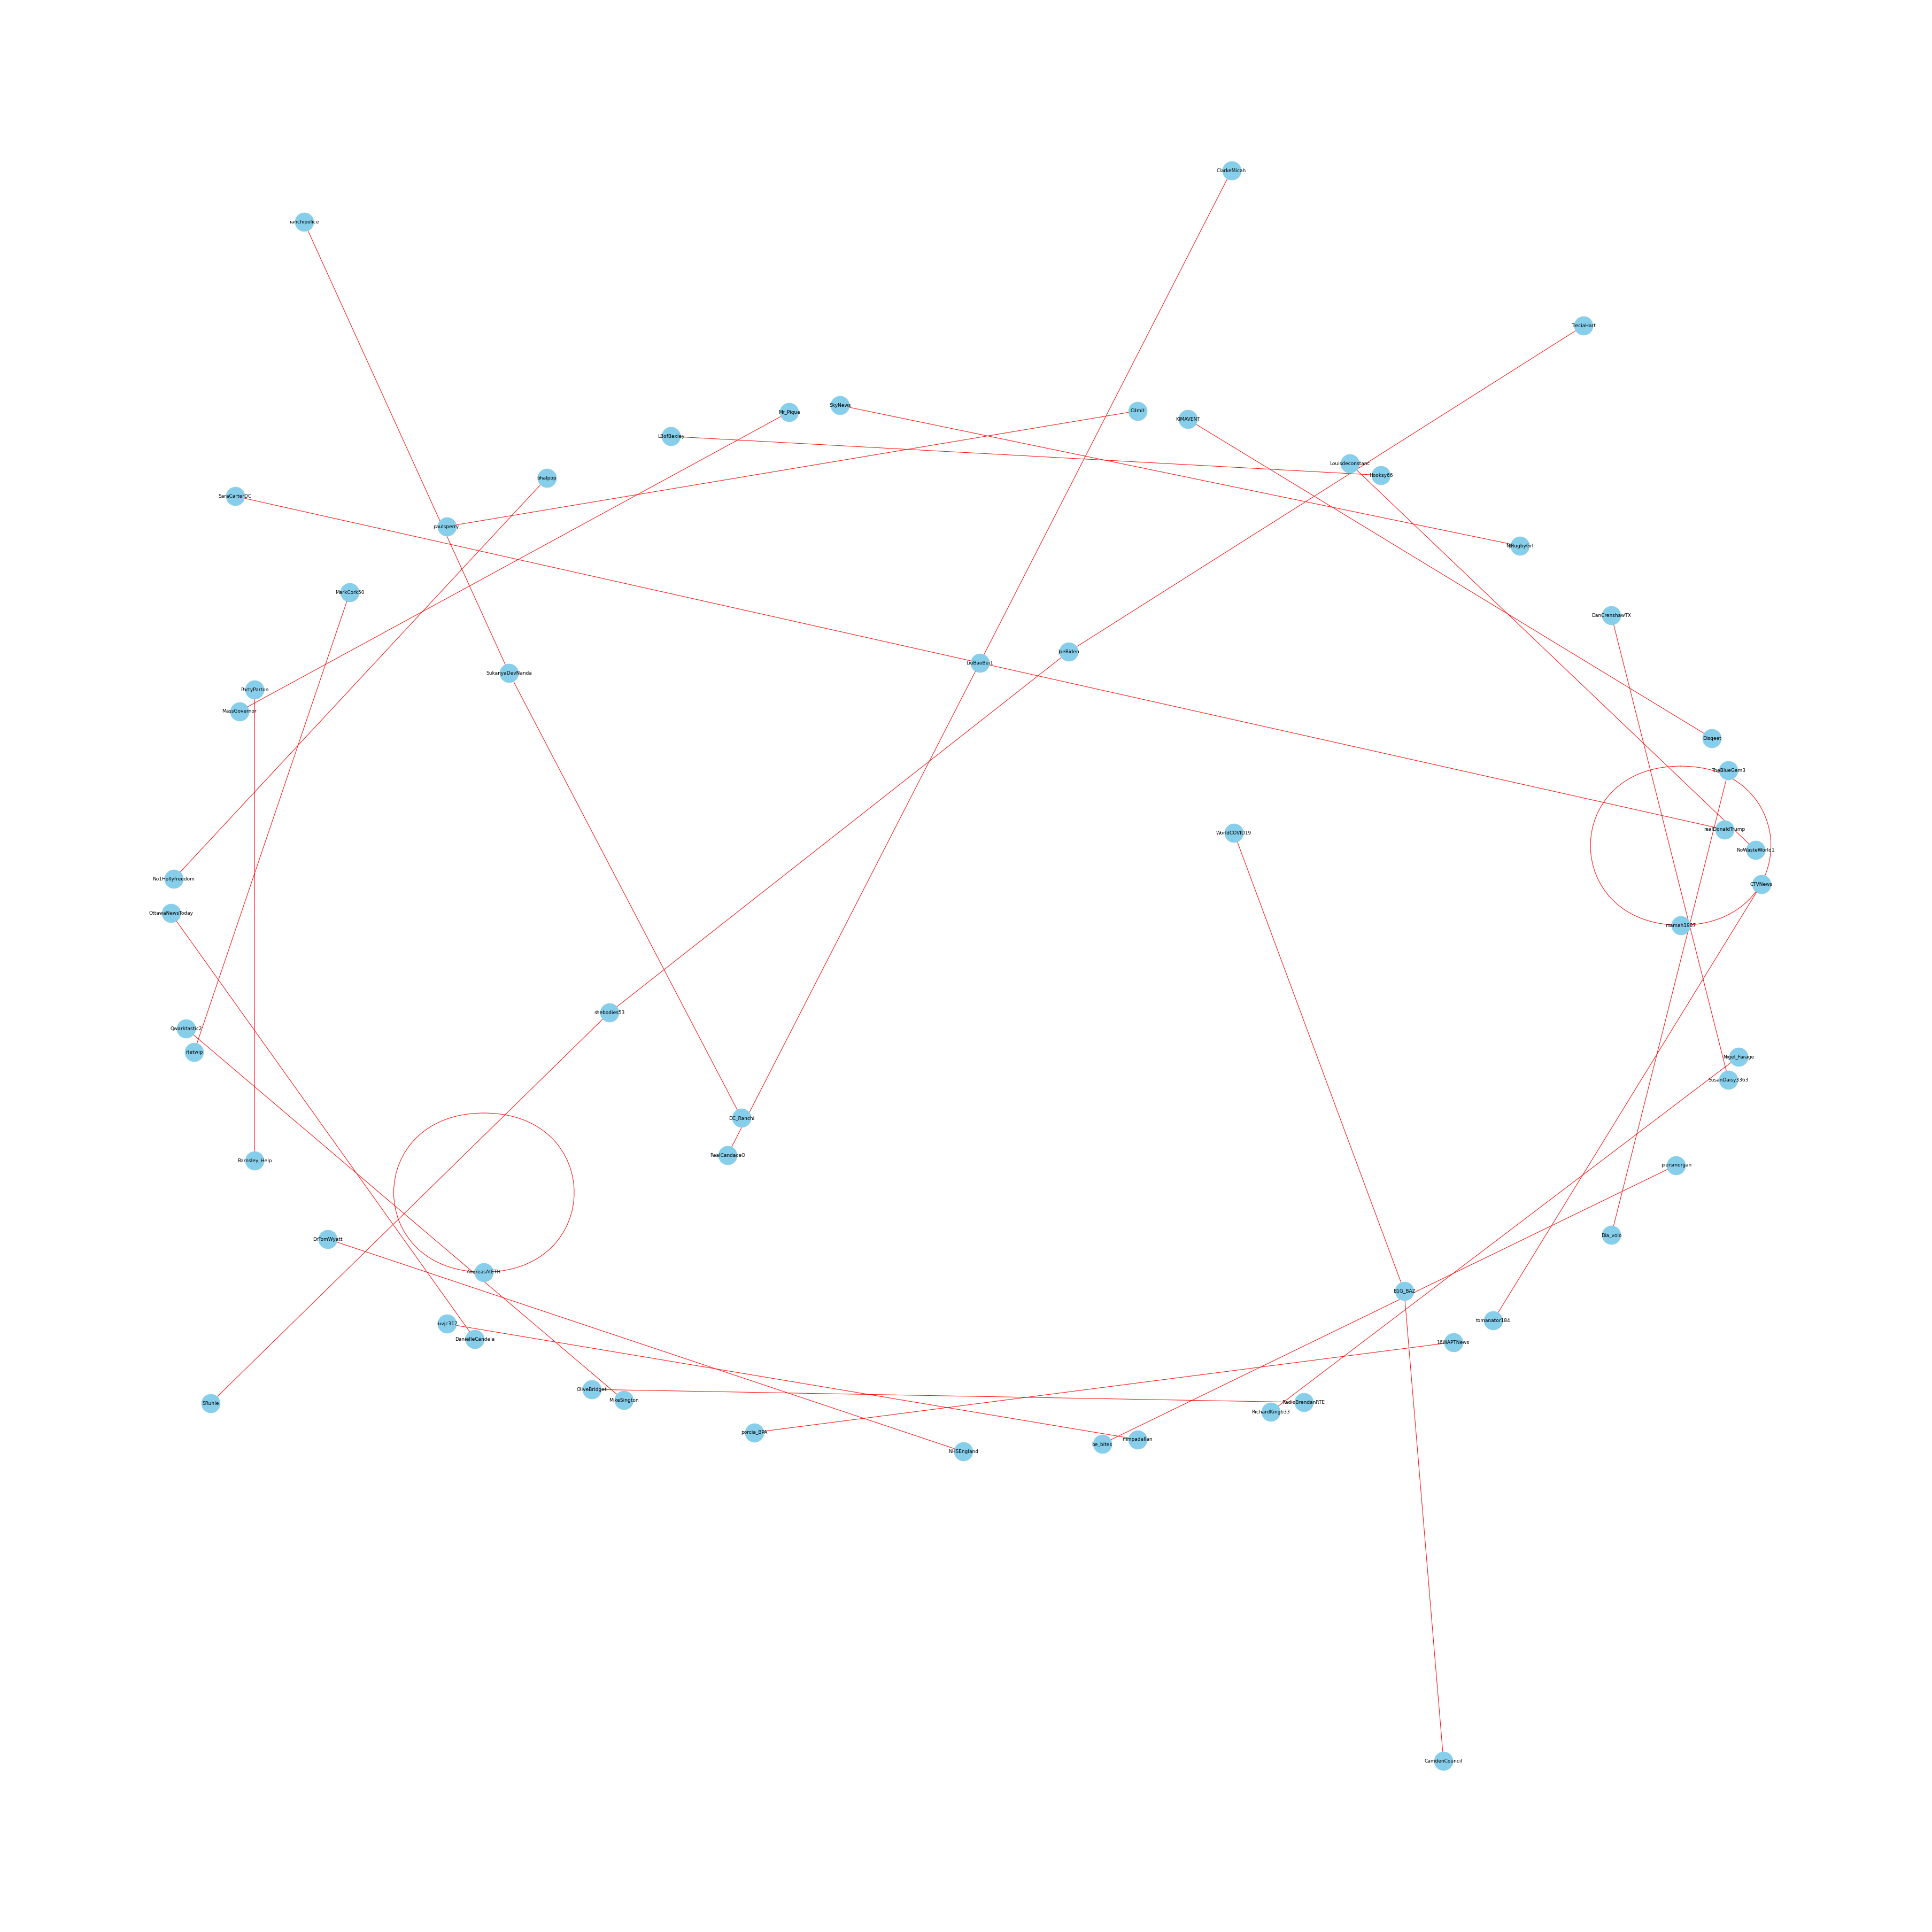

In [ ]:
# Contstruct a Network
G1 = nx.from_pandas_edgelist(df_tweets2)

# Visualize the Network
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
nx.draw(G1, with_labels=True, 
        node_color='skyblue', node_size=1200, 
        arrowstyle='->',arrowsize=20, edge_color='r',
        font_size=9,
        pos=nx.kamada_kawai_layout(G1))

### **Network Metrics and Measurement**

Centrality Measurement

In [ ]:
# Degree Centrality
degree = nx.degree_centrality(G1)

# Sorted from the Highest
sorted(nx.degree(G1), key=lambda x: x[1], reverse=True)[0:10]

[('LiuBaoBei1', 4),
 ('mamah1987', 2),
 ('JoeBiden', 2),
 ('SukanyaDevNanda', 2),
 ('shebodies53', 2),
 ('AndreasAtETH', 2),
 ('B1G_BAZ', 2),
 ('SusanDaisy3363', 1),
 ('DanCrenshawTX', 1),
 ('realDonaldTrump', 1)]

In [ ]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(G1)

# Sorted from the Highest
sorted(nx.betweenness_centrality(G1, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('LiuBaoBei1', 0.003896103896103896),
 ('JoeBiden', 0.0012987012987012987),
 ('shebodies53', 0.0012987012987012987),
 ('SukanyaDevNanda', 0.0006493506493506494),
 ('B1G_BAZ', 0.0006493506493506494),
 ('mamah1987', 0.0),
 ('SusanDaisy3363', 0.0),
 ('DanCrenshawTX', 0.0),
 ('realDonaldTrump', 0.0),
 ('NoWasteWorld1', 0.0)]

In [ ]:
# Closeness Centrality
closeness = nx.closeness_centrality(G1)

# Sorted from the Highest
sorted(nx.closeness_centrality(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('LiuBaoBei1', 0.07142857142857142),
 ('realDonaldTrump', 0.04081632653061224),
 ('ClarkeMicah', 0.04081632653061224),
 ('SaraCarterDC', 0.04081632653061224),
 ('RealCandaceO', 0.04081632653061224),
 ('JoeBiden', 0.040178571428571425),
 ('shebodies53', 0.040178571428571425),
 ('SukanyaDevNanda', 0.03571428571428571),
 ('B1G_BAZ', 0.03571428571428571),
 ('TreciaHart', 0.026785714285714284)]

In [ ]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality_numpy(G1)

# Sorted from the Highest
sorted(nx.eigenvector_centrality_numpy(G1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('LiuBaoBei1', 0.7071067811865476),
 ('realDonaldTrump', 0.35355339059327384),
 ('ClarkeMicah', 0.3535533905932738),
 ('SaraCarterDC', 0.35355339059327373),
 ('RealCandaceO', 0.3535533905932736),
 ('SRuhle', 2.116625198631502e-16),
 ('JoeBiden', 1.593885634052667e-16),
 ('TheBlueGem3', 1.1102230246251568e-16),
 ('Dia_volo', 8.326672684688675e-17),
 ('MarkCork50', 7.826282716442139e-17)]

**Network Topology Measurement**

In [ ]:
# Show Number of Nodes
nx.number_of_nodes(G1)

57

In [ ]:
# Show Number of Edges
nx.number_of_edges(G1)

33

In [ ]:
# Show Graph Density
nx.density(G1)

0.020676691729323307

In [ ]:
# Show Number of Connected Component
nx.number_connected_components(G1)

26

### Community Detection

Dalam community detection, tujuannya adalah untuk membagi jaringan ke dalam daerah-daerah pada graph. Daerah tersebut biasanya sesuai dengan entitas-entitas yang memiliki
hubungan erat, dan dapat dikatakan sebagai satu komunitas

**Modularity Community**

In [ ]:
# Import Module
from networkx.algorithms.community import greedy_modularity_communities

# Modularity Community Detection
communities_m = sorted(greedy_modularity_communities(G1), key=len, reverse=True)
communities_m

[frozenset({'ClarkeMicah',
            'LiuBaoBei1',
            'RealCandaceO',
            'SaraCarterDC',
            'realDonaldTrump'}),
 frozenset({'JoeBiden', 'SRuhle', 'TreciaHart', 'shebodies53'}),
 frozenset({'DC_Ranchi', 'SukanyaDevNanda', 'ranchipolice'}),
 frozenset({'B1G_BAZ', 'CamdenCouncil', 'WorldCOVID19'}),
 frozenset({'DanCrenshawTX', 'SusanDaisy3363'}),
 frozenset({'Louisdeconstanc', 'NoWasteWorld1'}),
 frozenset({'Disqeet', 'KIMAVENT'}),
 frozenset({'NJRugbyGrl', 'SkyNews'}),
 frozenset({'Hooksy66', 'LBofBexley'}),
 frozenset({'Cdmit', 'paulsperry_'}),
 frozenset({'MassGovernor', 'Mr_Pique'}),
 frozenset({'No1Hollyfreedom', 'bhalpop'}),
 frozenset({'MarkCork50', 'rtetwip'}),
 frozenset({'Barnsley_Help', 'PartyParton'}),
 frozenset({'DanielleCandela', 'OttawaNewsToday'}),
 frozenset({'MikeSington', 'Qwarktastic2'}),
 frozenset({'DrTomWyatt', 'NHSEngland'}),
 frozenset({'luvjc317', 'mmpadellan'}),
 frozenset({'OliveBridget', 'RadioBrendanRTE'}),
 frozenset({'16WAPTNe